In [2]:
import time
import random
from IPython.display import clear_output

#Default Values
player1Coins, player2Coins, boardCoins  = 0, 0, 0

turnCoinLimit = 3

#To see the efficiency of the bot we need to try out a large amount of coins to easily see the difference
#Player 1 will be using a random number of coins
#Player 2 will be our ruled based bot
startBoardCoins = 500

#We will use this to turn off most of the outputs in the game
simulation = True 

In [3]:
#Advanced Player Choices 
#The rules here are for the most efficient way to get to the end of the game and try win with some strategy in mind
#Since we don't expect the rules of the game to change we can make some more strict rules for the bot to follow

def baselineThinking(boardCoins, turnCoinLimit):
    
    # If we don't want to take forever for this game to finish we can just return 3 if the amount of coins left is large
    if boardCoins // turnCoinLimit > 3:
        return 3

    # If there are 1, 2, or 3 coins left, take them all to win the game
    if boardCoins == 2 or boardCoins == 3:
        return boardCoins-1

    # If there are 4 coins left, take 3 coins to leave 1 for the next player and make them lose the game
    if boardCoins == 4:
        return 3

    # If there are 5 coins left, take 1 coin, if the next player isn't smart they wwon't take 3 and win the game
    if boardCoins == 5:
        return 1

    # For anything else we didn't account for just return a random value
    return random.randint(1, 3)

def main(player1Coins, player2Coins, boardCoins, startBoardCoins, simulation):
    boardCoins = startBoardCoins
    playerWon = 0
    turnCount = 0

    if simulation == False:
        print("\n")
        print("Spoof Game Starting")
        print("Board Coins:", str(boardCoins))
        print("\n")
    
    while boardCoins > 1:
    #for i in range(5):
        #Increase turn counter
        turnCount = turnCount + 1
        #Announce Round Start
        if simulation == False:
            print("[Round", str(turnCount)+"] Started")
        
        
        player1Choice = random.randint(1, turnCoinLimit)
        if simulation == False:
            print("[Player 1] Chose:", player1Choice)
        if boardCoins-player1Choice <= 0:
            if simulation == False:
                print("[Player 1] LOST")
            playerWon = 2
            break
        else:
            boardCoins =boardCoins-player1Choice
            if simulation == False:
                print("Board Coins Remaining:", str(boardCoins)+"/"+str(startBoardCoins))
        
        #End game since there is no option left other than draw 1
        if boardCoins == 1:
            if simulation == False:
                print("[Player 2] LOST")
            playerWon = 1
            break
        
        
        player2Choice = baselineThinking(boardCoins, turnCoinLimit)
        if simulation == False:
            print("[Player 2] Chose:", player2Choice)
        if boardCoins-player2Choice <= 0:
            if simulation == False:
                print("[Player 2] LOST")
            playerWon = 1
            break
        else:
            boardCoins =boardCoins-player2Choice
            if simulation == False:
                print("Board Coins Remaining:", str(boardCoins)+"/"+str(startBoardCoins))
            
        #End game since there is no option left other than draw 1
        if boardCoins == 1:
            if simulation == False:
                print("[Player 1] LOST")
            playerWon = 2
            break

        #Announce Round End
        #print("[Round", str(turnCount)+"] Ended")
    
    if simulation == False:
        print("\n")
        print("\n")
        print("Rounds Taken:", str(turnCount))
        print("Board Coins:", str(boardCoins)+"/"+str(startBoardCoins))
    return playerWon, turnCount

In [4]:
playerWon, turnCount = main(player1Coins, player2Coins, boardCoins, startBoardCoins, simulation)
print("P"+str(playerWon))
print(turnCount)

P2
104


#### Next Steps:
- We want to be simulating games to see the effectiveness of the AI BOT (Player 2)

#### How do we store this data?
- We could store it in a list but we are not storing only the amount of rounds but also the player that has won the game as we want to measure the % of games won and the total number of rounds taken for each game. So we will be using pandas dataframes to store this 2d dataframe as it will allow us to more easily analyse the data.

In [5]:
# Importing Pandas to create DataFrame
import pandas as pd
import numpy as np

#Create a dataframe with the specified columns
df = pd.DataFrame(columns=['Game', 'Player', 'Rounds'])

#Lets run 100 games 
for i in range(5000):
    i = i + 1

    playerWon, turnCount = main(player1Coins, player2Coins, boardCoins, startBoardCoins, simulation)
    df = df.append({'Game': int(i),'Player': int(playerWon), 'Rounds': int(turnCount)}, ignore_index=True)

df['Game'] = df['Game'].astype(int)
df['Player'] = df['Player'].astype(int)
df['Rounds'] = df['Rounds'].astype(int)
#df.dtypes 

df


,Game,Player,Rounds
0,1,2,100
1,2,2,102
2,3,2,102
3,4,2,102
4,5,2,101
...,...,...,...
4995,4996,2,101
4996,4997,2,104
4997,4998,2,101
4998,4999,1,98


In [6]:
df['Player'].value_counts(normalize=True) * 100

2    83.22
1    16.78
Name: Player, dtype: float64

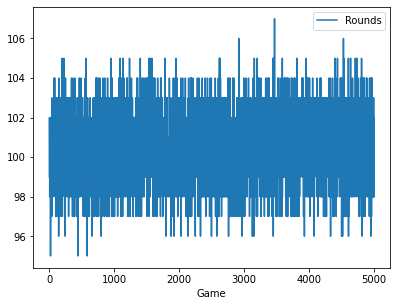

In [230]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (20,10)
#Reset custom plot size
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

df2 = df
df2.plot(x='Game', y='Rounds')
plt.show()

#The data is very hard to read and we could just make the graph output bigger on the X axis

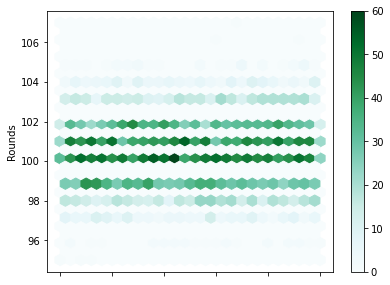

In [211]:
#Using hexbin it allows us to view the distribution of the amount of rounds played for each game
df.plot.hexbin(x="Game", y="Rounds", gridsize=25);

<AxesSubplot:>

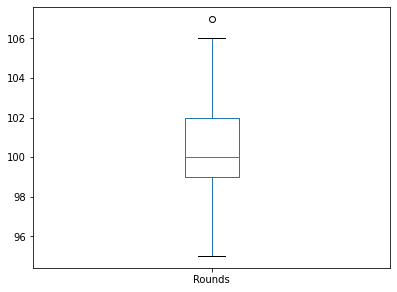

In [212]:
#We could also use box plots to view this data
dfRounds = df[["Rounds"]]
dfRounds.plot.box()